In [1]:
import numpy as np
import struct
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import pandas as pd
import seaborn as sns

# Read in the Training Images/Labels

In [2]:
def read_idx3(fp):
    with open(fp, 'rb') as f:
        magic_number, num_images, num_rows, num_cols = struct.unpack('>IIII', f.read(16))
        images = np.frombuffer(f.read(), dtype=np.uint8)
        images = images.reshape(num_images, num_rows, num_cols)
        return images

In [3]:
def read_idx1(fp):
    with open(fp, 'rb') as f:
        magic_number, num_labels = struct.unpack('>II', f.read(8))
        labels = np.frombuffer(f.read(), dtype=np.uint8)
        return labels

In [4]:
train_images = read_idx3('data/train-images.idx3-ubyte')
train_images = train_images.astype(np.float64)
train_images

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
train_labels = read_idx1('data/train-labels.idx1-ubyte')
train_labels = train_labels.astype(int)
train_labels

array([5, 0, 4, ..., 5, 6, 8])

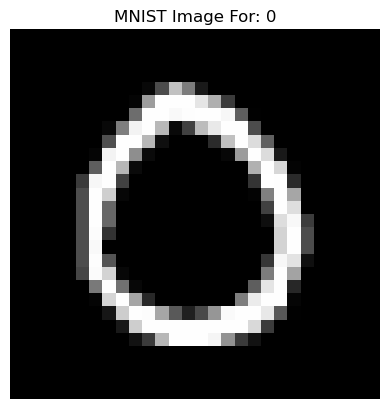

In [7]:
plt.imshow(train_images[2340], cmap='gray')
plt.title(f'MNIST Image For: {train_labels[2340]}')
plt.axis('off')
plt.show()

In [8]:
test_images = read_idx3('data/t10k-images.idx3-ubyte')
test_images = test_images.astype(np.float64)
test_images

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [9]:
test_images.shape

(10000, 28, 28)

In [10]:
test_labels = read_idx1('data/t10k-labels.idx1-ubyte')
test_labels = test_labels.astype(int)
test_labels

array([7, 2, 1, ..., 4, 5, 6])

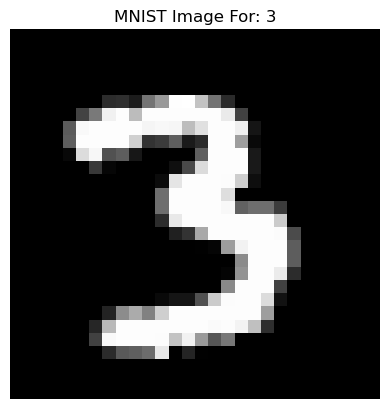

In [11]:
plt.imshow(test_images[500], cmap='gray')
plt.title(f'MNIST Image For: {test_labels[500]}')
plt.axis('off')
plt.show()

# Data Prep

In [12]:
num_subsets = np.array([10000, 5000, 1000])

train_images_reshaped = train_images.reshape(train_images.shape[0], -1) / 255.0
test_images_reshaped = test_images.reshape(test_images.shape[0], -1) / 255.0

# Random Sampling

## 1 Nearest Neighbors

In [28]:
accuracy_scores = []

# Perform classification for different subset sizes
for k in num_subsets:

    # Efficient subset selection using numpy random choice
    train_subset = np.random.choice(train_images_reshaped.shape[0], size=k, replace=False)

    # Select prototype images and labels
    prototype_images = train_images_reshaped[train_subset]
    prototype_labels = train_labels[train_subset]


    # Compute distances between all test images and prototype images
    distances = cdist(test_images_reshaped, prototype_images)

    # Find the index of the nearest prototype for each test image
    nearest_indices = np.argmin(distances, axis=1)

    # Predict labels based on nearest prototype
    predicted_labels = prototype_labels[nearest_indices]

    # Calculate accuracy for this subset
    accuracy = np.mean(predicted_labels == test_labels)
    accuracy_scores.append(accuracy)

In [29]:
accuracy_scores = np.array(accuracy_scores)
accuracy_scores

array([0.9466, 0.9383, 0.8827])

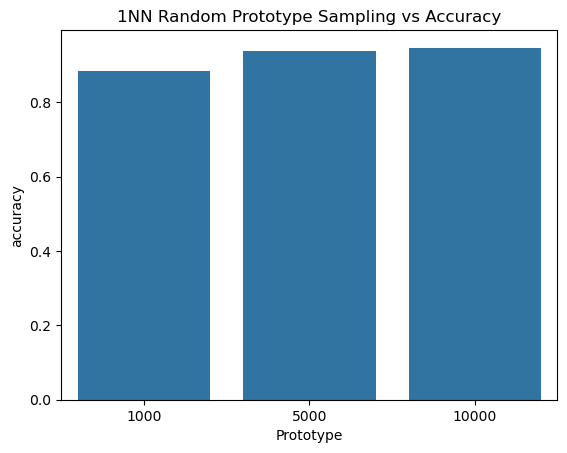

In [30]:

df = pd.DataFrame({
    'Prototype': num_subsets,
    'accuracy': accuracy_scores
})
sns.barplot(x='Prototype', y='accuracy', data = df)
plt.title('1NN Random Prototype Sampling vs Accuracy')
plt.show()

# K Means Prototyping

In [13]:
from sklearn.cluster import MiniBatchKMeans

## K Means

In [18]:
def run_kmeans(num_clusters):
    kmeans = MiniBatchKMeans(n_clusters=num_clusters, init = 'random', batch_size=1000, random_state=42)
    kmeans.fit(train_images_reshaped)
    centroids = kmeans.cluster_centers_

    labels = np.zeros(num_clusters, dtype=int)

    for i in range(num_clusters):
        cluster_incidies = np.where(kmeans.labels_ == i)[0]

        if len(cluster_incidies) == 0:
            labels[i] = -1
            continue

        cluster_labels = train_labels[cluster_incidies]
        labels[i] = np.bincount(cluster_labels).argmax()
    return centroids, labels

In [21]:
accuracy_scores = []

for k in num_subsets:

    # Efficient subset selection using numpy random choice
    knn_centroids, knn_labels = run_kmeans(k)

    # Compute distances between all test images and prototype images
    distances = cdist(test_images_reshaped, knn_centroids)

    # Find the index of the nearest prototype for each test image
    nearest_indices = np.argmin(distances, axis=1)

    # Predict labels based on nearest prototype
    predicted_labels = knn_labels[nearest_indices]

    # Calculate accuracy for this subset
    accuracy = np.mean(predicted_labels == test_labels)
    accuracy_scores.append(accuracy)

In [22]:
accuracy_scores = np.array(accuracy_scores)
accuracy_scores

array([0.9592, 0.9542, 0.9372])

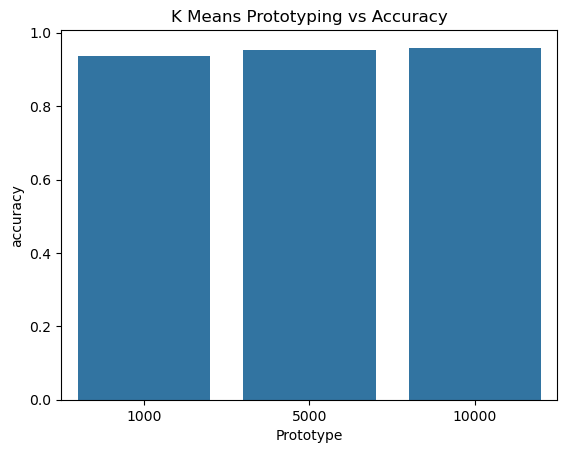

In [23]:
df = pd.DataFrame({"Prototype": num_subsets, "accuracy": accuracy_scores})
sns.barplot(x="Prototype", y="accuracy", data=df)
plt.title("K Means Prototyping vs Accuracy")
plt.show()

## K Means++

In [24]:
def run_kmeans_plus(num_clusters):
    kmeans = MiniBatchKMeans(n_clusters=num_clusters, init = 'k-means++', batch_size=1000, random_state=42)
    kmeans.fit(train_images_reshaped)
    centroids = kmeans.cluster_centers_

    labels = np.zeros(num_clusters, dtype=int)

    for i in range(num_clusters):
        cluster_incidies = np.where(kmeans.labels_ == i)[0]

        if len(cluster_incidies) == 0:
            labels[i] = -1
            continue

        cluster_labels = train_labels[cluster_incidies]
        labels[i] = np.bincount(cluster_labels).argmax()
    return centroids, labels

In [25]:
accuracy_scores = []

for k in num_subsets:

    # Efficient subset selection using numpy random choice
    knn_centroids, knn_labels = run_kmeans_plus(k)

    # Compute distances between all test images and prototype images
    distances = cdist(test_images_reshaped, knn_centroids)

    # Find the index of the nearest prototype for each test image
    nearest_indices = np.argmin(distances, axis=1)

    # Predict labels based on nearest prototype
    predicted_labels = knn_labels[nearest_indices]

    # Calculate accuracy for this subset
    accuracy = np.mean(predicted_labels == test_labels)
    accuracy_scores.append(accuracy)

In [26]:
accuracy_scores = np.array(accuracy_scores)
accuracy_scores

array([0.9555, 0.9552, 0.9368])

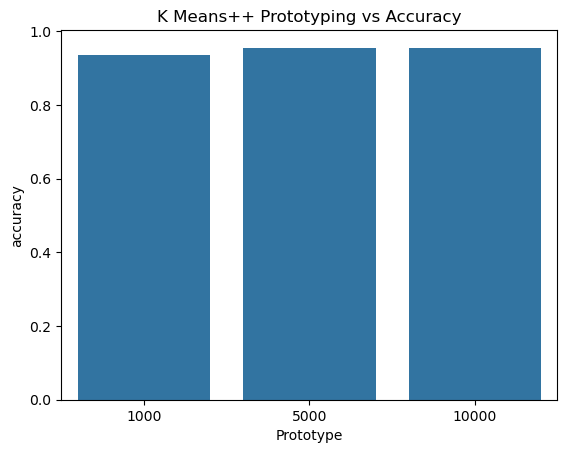

In [27]:
df = pd.DataFrame({"Prototype": num_subsets, "accuracy": accuracy_scores})
sns.barplot(x="Prototype", y="accuracy", data=df)
plt.title("K Means++ Prototyping vs Accuracy")
plt.show()